## keras 构建CNN网络手写体识别

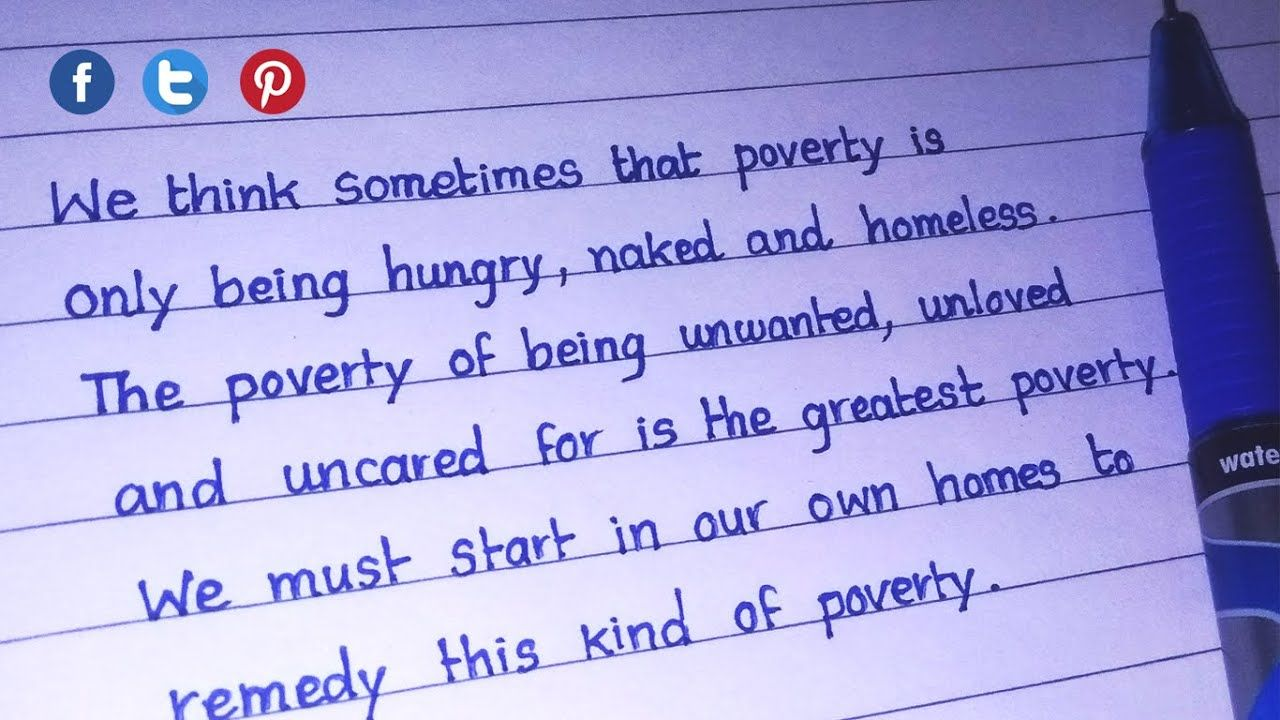

<img src='../static/img/logo.jpg' align='right' style="width:260px;height:80 px"/>


In [6]:
!pip install keras

In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
# 提取数据进行训练和测试
# 训练数据
train_images_part = train_images[:50000].reshape((50000, 28, 28, 1))
train_images_part = train_images_part.astype('float32') / 255
train_labels_part = train_labels[:50000]
print(train_images_part.shape)
# 验证数据
val_x = train_images[-10000:].reshape((10000, 28, 28, 1))
val_x = val_x.astype('float32') / 255
val_y = train_labels[-10000:]
print(val_x.shape)
# 测试数据
test_images_part = test_images[:10000].reshape((10000, 28 , 28, 1))
test_images_part = test_images_part.astype('float32') / 255
test_labels_part = test_labels[:10000]
print(test_labels_part.shape)


(50000, 28, 28, 1)
(10000, 28, 28, 1)
(10000,)


In [2]:
# 处理标签（对标签进行分类编码）
from keras.utils import to_categorical
train_labels_part = to_categorical(train_labels_part)
val_y = to_categorical(val_y)
print(val_y.shape)
test_labels_part = to_categorical(test_labels_part)
test_labels.shape

(10000, 10)


(10000,)

In [3]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dropout, Dense
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam

model = Sequential()
model.add(Conv2D(64, (3,3), activation='relu', input_shape=[28, 28, 1]))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
             optimizer=Adam(),
             metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 9216)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               1179776   
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [5]:
batch_size = 128
epochs = 10
history = model.fit(train_images_part, 
                    train_labels_part, 
                    batch_size = batch_size, 
                    epochs=epochs, 
                    validation_data=(val_x, val_y))

test_loss, test_acc = model.evaluate(test_images_part, test_labels_part)
print('test_loss:{}, test_acc:{}'.format(test_loss, test_acc))

313/313 [==============================] - 3s 10ms/step - loss: 0.0399 - accuracy: 0.9867
test_loss:0.03994407504796982, test_acc:0.9866999983787537


In [6]:
model.save('mnist_CNN.h5')

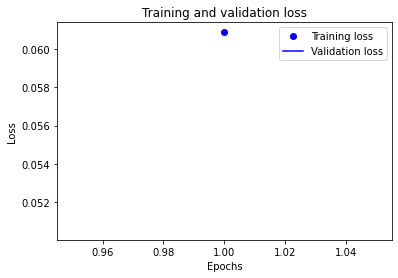

In [7]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()